In [1]:
import os 
import sys 
sys.path.append('../lznestpy')

import nestpy
from random import choices
from nestUtils import *

In [2]:
detector = nestpy.LZ_Detector()
detector.SetSR3Configuration()

detector.set_s2_thr(0.)

field = 96.5 # V/cm
nc = nestpy.NESTcalc( detector )

sample_size = 100000

In [3]:
energies = np.random.uniform(3, 80, size=sample_size)
print(f'energies: {energies}')
interactionType = nestpy.INTERACTION_TYPE(0) # 0 for NR, 8 for betas      

quantas = generate_quanta(NESTcalc= nc, 
                          interaction= interactionType, 
                          energy_array= energies, 
                          field= field, 
                          density = 2.9)

energies: [70.67519217 21.56917038  8.14136151 ... 56.54634327 17.28416172
 68.6278886 ]
Processing energy 0 of 100000
Processing energy 10000 of 100000
Processing energy 20000 of 100000
Processing energy 30000 of 100000
Processing energy 40000 of 100000
Processing energy 50000 of 100000
Processing energy 60000 of 100000
Processing energy 70000 of 100000
Processing energy 80000 of 100000
Processing energy 90000 of 100000


In [5]:
random_R2 = np.random.uniform( 0., 698.*698., sample_size )
random_phi = np.random.uniform( 0., 2.*np.pi, sample_size )
random_X = np.sqrt( random_R2 ) * np.cos( random_phi )
random_Y = np.sqrt( random_R2 ) * np.sin( random_phi )

random_driftTimes = np.random.uniform( 0., 1045., sample_size )

driftVelocity = nc.SetDriftVelocity(detector.get_T_Kelvin(), 2.9, field )
random_Z = detector.get_TopDrift() - random_driftTimes*driftVelocity




In [6]:
print(quantas[0].electrons, quantas[0].photons, quantas[0].ions, quantas[0].excitons)


29 30 34 25


In [7]:
S1s = generate_S1_highEnergy(nc, 
                            interactionType, 
                            energies, 
                            field, 
                            quantas, 
                            random_X, 
                            random_Y, 
                            random_Z, 
                            driftVelocity)

S2s = (generate_S2(nc, 
                    interactionType, 
                    energies, 
                    field, 
                    quantas, 
                    random_X, 
                    random_Y, 
                    random_Z, 
                    driftVelocity, 
                    random_driftTimes ))




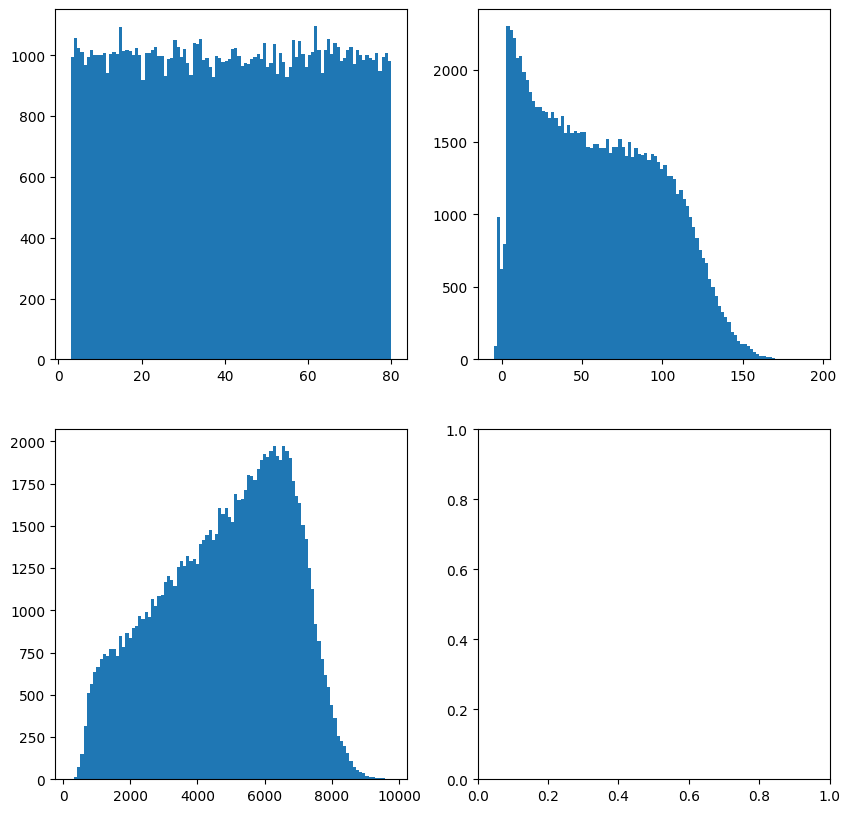

In [8]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].hist(energies, bins=100)
axs[0, 1].hist(S1s, bins=100)
axs[1, 0].hist(S2s, bins=100)
plt.show()